Cropping the MTSD and sorting into the proper classes.

In [ ]:
from PIL import Image
import json
import glob
import os

def get_pil_box(bbox):
    return (bbox["xmin"], bbox["ymin"], bbox["xmax"], bbox["ymax"])

# Edit these two variable to control the input and output directories
mtsd_root = "/Users/.../mtsd_fully_annotated" # Path to root of original files
out_root = "/Users/.../APS360-Project/dataset" # Directory to output to (will be created if it doesnt exist)

json_root = os.path.join(mtsd_root, "annotations/")

missing_file_count = 0
total_file_count = 0
for imagefile in glob.glob(os.path.join(mtsd_root, "images/*.jpg")):
    total_file_count += 1
    # Only print every 100 lines
    if total_file_count % 100 == 0:
        print(total_file_count)
    
    name, _ = os.path.splitext(os.path.basename(imagefile))
    img = Image.open(imagefile)

    try:
        with open(os.path.join(json_root, name + ".json")) as jsonfile:
            annotations = json.load(jsonfile)

        for obj in annotations["objects"]:
            key = obj["key"]
            label = obj["label"]
            crop = img.crop(get_pil_box(obj["bbox"]))
            
            out_dir = os.path.join(out_root, label)
            os.makedirs(out_dir, exist_ok=True)
            crop.save(os.path.join(out_dir, key + ".jpg"))
    except FileNotFoundError:
        # print("Warning: %s skipped because .json may not exist" % imagefile)
        missing_file_count += 1
    except Exception as e:
        print("Error: %s" % e)

print("Number of files without .jsons {} which is {}%".format(missing_file_count, missing_file_count/total_file_count))

Error: tile cannot extend outside image
Number of files without .jsons 8 which is 0.1509433962264151%


Highest count class is: regulatory--yield--g1 with 2775 items
Lowest count class is: regulatory--shared-path-bicycles-and-pedestrians--g1 with 20 items


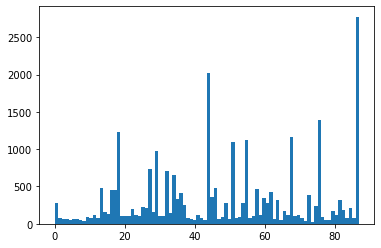

In [ ]:
# plot histogram of all classes in cropped dataset
import matplotlib.pyplot as plt
import os, os.path

dataset_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\unique_dataset\\regulatory'
reg_classes = os.listdir(dataset_folder)
items = []
highest = None
highest_count = 0
lowest = None
lowest_count = 1e10
for i,class_dir in enumerate(reg_classes):
    fl = dataset_folder+'\\'+class_dir
    if len(os.listdir(fl)) > highest_count:
        highest = class_dir
        highest_count = len(os.listdir(fl))
    if len(os.listdir(fl)) < lowest_count:
        lowest = class_dir
        lowest_count = len(os.listdir(fl))
    for fi in os.listdir(fl):
        items.append(i)     
plt.hist(items,bins=len(reg_classes))
print("Highest count class is: {} with {} items".format(highest,highest_count))
print("Lowest count class is: {} with {} items".format(lowest,lowest_count))

In [ ]:
# check all the classes count
for i,class_dir in enumerate(reg_classes):
    fl = dataset_folder+'\\'+class_dir
    print("Class name: {} with {} items".format(class_dir,len(os.listdir(fl))))

Class name: regulatory--bicycles-only--g1 with 282 items
Class name: regulatory--buses-only--g1 with 76 items
Class name: regulatory--do-not-block-intersection--g1 with 58 items
Class name: regulatory--dual-lanes-go-straight-on-left--g1 with 64 items
Class name: regulatory--dual-lanes-go-straight-on-right--g1 with 50 items
Class name: regulatory--dual-path-bicycles-and-pedestrians--g1 with 60 items
Class name: regulatory--end-of-bicycles-only--g1 with 58 items
Class name: regulatory--end-of-maximum-speed-limit-70--g1 with 57 items
Class name: regulatory--end-of-no-parking--g1 with 37 items
Class name: regulatory--end-of-priority-road--g1 with 92 items
Class name: regulatory--end-of-prohibition--g1 with 82 items
Class name: regulatory--end-of-speed-limit-zone--g1 with 117 items
Class name: regulatory--give-way-to-oncoming-traffic--g1 with 76 items
Class name: regulatory--go-straight--g1 with 485 items
Class name: regulatory--go-straight-or-turn-left--g1 with 153 items
Class name: regula

In [ ]:
# data augmentation

import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

# pick a random degree of rotation between 25% on the left and 25% on the right
def random_rotation(image_array: ndarray):
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

# add random noise to the image
def random_noise(image_array: ndarray):
    return sk.util.random_noise(image_array)



In [ ]:
# locally split cropped dataset
pip install split_folders

In [ ]:
import split_folders
input_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\unique_dataset\\regulatory'
output_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\split_unique_datasets'
split_folders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.70, .15, .15))

In [ ]:
# Split uncropped dataset on google colab
!pip install gdown

In [ ]:
# Access denied, will have to do it locally
!gdown --id 1Fjn2RV8BBRZhtiwJA9Wdg-3BMt9Z_pyJ --output regulatory.zip

In [ ]:
# Check num of dataset
import os, os.path
base_dir = 'C:\\jeremy\\Assignments\\APS360\\Project\\Regulatory\\'
print("Annotation files: {}".format(len(os.listdir(base_dir+'annotations'))))
print("image files: {}".format(len(os.listdir(base_dir+'images'))))
print(os.listdir(base_dir+'annotations')[0])
print(os.listdir(base_dir+'images')[0])

Annotation files: 18027
image files: 18027
--7fWq6WjZM8L1eUSuvOEA.json
--7fWq6WjZM8L1eUSuvOEA.jpg


In [ ]:
# split uncropped images
import os
from glob import glob
import shutil
from sklearn.model_selection import train_test_split

# find all image file names
image_files = glob(base_dir+'images\\*.jpg')
image_names = [name.replace(".jpg","").split('\\')[-1] for name in image_files]

# split names into 70% train, 15% val and 15% test
train_names, test_names = train_test_split(image_names, test_size=0.3,random_state=1)
val_names, test_names = train_test_split(test_names, test_size=0.5,random_state=1)
print(f'Train: {len(train_names)}, Val: {len(val_names)}, Test: {len(test_names)}')

Train: 12618, Val: 2704, Test: 2705


In [ ]:
# split the files
def move_files(file_names, source_path, destination_path):
    # create dir if not exist
    if not os.path.exists(destination_path):
        os.makedirs(destination_path)
    if not os.path.exists(destination_path+'images'):
        os.makedirs(destination_path+'images')
    if not os.path.exists(destination_path+'annotations'):
        os.makedirs(destination_path+'annotations')
    
    # move images with given name
    for fi in file_names:
         image = fi+'.jpg'
         json = fi+'.json'
         
         shutil.move(os.path.join(source_path+'images', image), 
                     os.path.join(destination_path+'images', image))
         shutil.move(os.path.join(source_path+'annotations', json),
                     os.path.join(destination_path+'annotations', json))
    return

source_path = base_dir
destination_path = 'C:\\jeremy\\Assignments\\APS360\\Project\\split_regulatory_dataset\\'
move_files(train_names,source_path,(destination_path+'train\\'))
move_files(val_names,source_path,(destination_path+'val\\'))
move_files(test_names,source_path,(destination_path+'test\\'))

In [ ]:
print("Train files: {}".format(len(os.listdir(destination_path+'train/images'))))
print("Val files: {}".format(len(os.listdir(destination_path+'val/images'))))
print("Test files: {}".format(len(os.listdir(destination_path+'test/images'))))

Train files: 12618
Val files: 2704
Test files: 2705


In [ ]:
# Create a zip if using Colab
!zip -r '/root/split_uncropped_dataset' -v '/root'

**Sign Detection Code**

Loaded some sample annotations + images into a dataset.

In [1]:
import csv
import numpy as np
import random
import torch
import torch.utils.data as data
from torch import nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent
from torchvision import datasets, transforms

import os
import os.path

import json

from PIL import Image


In [2]:
!pip install gdown
!gdown --id 1In9drHiS5rgA3KUEFJYmHPAjJxB7gpqo --output sample.zip 

Downloading...
From: https://drive.google.com/uc?id=1In9drHiS5rgA3KUEFJYmHPAjJxB7gpqo
To: /content/sample.zip
100% 157k/157k [00:00<00:00, 22.8MB/s]


In [3]:
!unzip sample.zip

Archive:  sample.zip
   creating: Sample_480/
   creating: Sample_480/annotations/
  inflating: Sample_480/annotations/79yoU5Wj9QOrBhX44AlDbw.json  
  inflating: Sample_480/annotations/9dCNXM_vfBrFOxSatT_GCw.json  
  inflating: Sample_480/annotations/d9DDXXHYoHpQlprTAy3EFg.json  
  inflating: Sample_480/annotations/IgNlFBYwJjzaI49nA5oLRQ.json  
  inflating: Sample_480/annotations/rI8un1roccPLAY7Elwe53g.json  
   creating: Sample_480/images/
  inflating: Sample_480/images/79yoU5Wj9QOrBhX44AlDbw.jpg  
  inflating: Sample_480/images/9dCNXM_vfBrFOxSatT_GCw.jpg  
  inflating: Sample_480/images/d9DDXXHYoHpQlprTAy3EFg.jpg  
  inflating: Sample_480/images/IgNlFBYwJjzaI49nA5oLRQ.jpg  
  inflating: Sample_480/images/rI8un1roccPLAY7Elwe53g.jpg  


In [4]:
class AnnotationDataSet(data.Dataset):
    def __init__(self, path_to_imgs, path_to_json, transform = None):
        self.path_to_imgs = path_to_imgs
        self.path_to_json = path_to_json
        self.image_ids = os.listdir(path_to_imgs)
        self.transform = transform

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        img_id = os.path.splitext(img_id)[0]
        img = Image.open(os.path.join(self.path_to_imgs, img_id + ".jpg"))
        json_file = json.load(open(os.path.join(self.path_to_json, img_id + ".json")))

        if self.transform:
            img = self.transform(img)

        return img, json_file

    def __len__(self):
        return len(self.image_ids)

In [6]:
sample_set = AnnotationDataSet("Sample_480/images", "Sample_480/annotations", transform=transforms.ToTensor())
#sample_set = AnnotationDataSet("Small_Sample/images", "Small_Sample/annotations")

torch.Size([3, 480, 480])


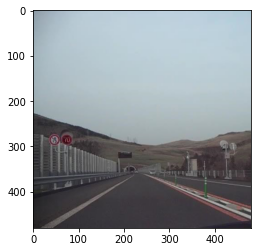

label: regulatory--no-overtaking--g2
bbox: {'xmin': 34.84375, 'ymin': 272.9296875, 'ymax': 299.0625, 'xmax': 60.46875}
label: other-sign
bbox: {'xmin': 61.5625, 'ymin': 272.578125, 'ymax': 297.7734375, 'xmax': 87.03125}
torch.Size([3, 480, 480])


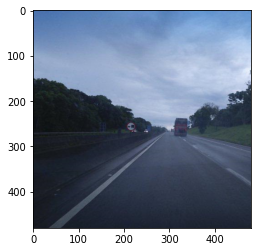

label: regulatory--keep-right--g6
bbox: {'xmin': 206.25, 'ymin': 247.03125, 'ymax': 265.546875, 'xmax': 225.625}
torch.Size([3, 480, 480])


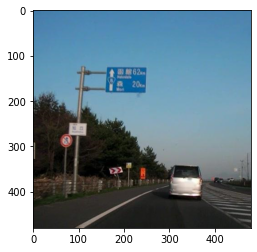

label: regulatory--no-overtaking--g2
bbox: {'xmin': 60.15625, 'ymin': 273.1640625, 'ymax': 301.5234375, 'xmax': 86.40625}
label: other-sign
bbox: {'xmin': 161.40625, 'ymin': 125.625, 'ymax': 180.703125, 'xmax': 248.28125}
label: other-sign
bbox: {'xmin': 79.84375, 'ymin': 248.7890625, 'ymax': 275.5078125, 'xmax': 116.09375}
label: other-sign
bbox: {'xmin': 167.5, 'ymin': 344.8828125, 'ymax': 360.703125, 'xmax': 197.5}
label: other-sign
bbox: {'xmin': 237.5, 'ymin': 348.1640625, 'ymax': 370.8984375, 'xmax': 246.875}
label: other-sign
bbox: {'xmin': 162.65625, 'ymin': 147.0703125, 'ymax': 163.359375, 'xmax': 182.1875}
torch.Size([3, 480, 480])


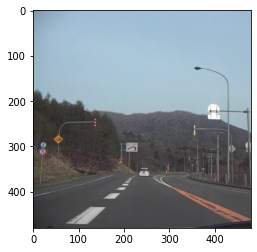

label: other-sign
bbox: {'xmin': 45.0, 'ymin': 272.9296875, 'ymax': 294.9609375, 'xmax': 65.9375}
label: regulatory--end-of-prohibition--g1
bbox: {'xmin': 15.625, 'ymin': 289.8046875, 'ymax': 302.9296875, 'xmax': 29.21875}
label: other-sign
bbox: {'xmin': 188.28125, 'ymin': 324.2578125, 'ymax': 333.515625, 'xmax': 198.4375}
label: other-sign
bbox: {'xmin': 130.15625, 'ymin': 236.8359375, 'ymax': 263.5546875, 'xmax': 143.28125}
label: regulatory--no-overtaking--g2
bbox: {'xmin': 11.5625, 'ymin': 303.6328125, 'ymax': 320.859375, 'xmax': 30.78125}
label: other-sign
bbox: {'xmin': 205.15625, 'ymin': 291.328125, 'ymax': 311.953125, 'xmax': 231.25}
torch.Size([3, 480, 480])


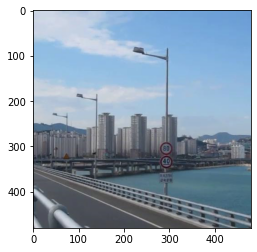

label: regulatory--maximum-speed-limit-80--g1
bbox: {'xmin': 279.375, 'ymin': 291.328125, 'ymax': 318.984375, 'xmax': 306.875}
label: regulatory--maximum-speed-limit-40--g1
bbox: {'xmin': 280.625, 'ymin': 319.453125, 'ymax': 349.6875, 'xmax': 306.875}
label: other-sign
bbox: {'xmin': 65.3125, 'ymin': 314.8828125, 'ymax': 329.4140625, 'xmax': 82.03125}
label: other-sign
bbox: {'xmin': 276.25, 'ymin': 358.125, 'ymax': 381.5625, 'xmax': 307.8125}


In [7]:
#Check if we can iterate through our dataset
import matplotlib.pyplot as plt

for img, json_file in iter(sample_set):
  print (img.shape)
  image = np.transpose(img, [1,2,0])
  # normalize pixel intensity values to [0, 1]
  #plt.axis('off')
  plt.imshow(image)
  plt.show()

  for i in json_file["objects"]:
    print ("label:", i["label"])
    print ("bbox:", i["bbox"])


In [8]:
sample_loader = torch.utils.data.DataLoader(sample_set, batch_size=1)
sd_size = 32 #Sliding window size
sd_stride = 2 #Sliding window stride - how many pixels to move

for img, json_file in iter(sample_loader):

  #I'll do the stuff under TODO later

  #TODO: Implement downsample loop on image
  #We can't change sliding window size because it would change our input size to our model
  #The paper I read downsampled their images by ~20-50% per iteration 5 times.
  #Need to also adjust bounding box positions (values will be scaled down at an equal ratio)

  #TODO: Pad images in a mini batch to be the same size
  #We would need to pad the images with a white or black border so they are all the same
  #size in the mini batch
  #Would need to adjust bounding box positions (values will need to be summed with the x or y padding size)

  #Sliding window
  for y_cor in range(0, img.shape[3] - sd_size, sd_stride):
    for x_cor in range(0, img.shape[2] - sd_size, sd_stride):
      sd = img[:,:, x_cor:x_cor+sd_size, y_cor:y_cor+sd_size]
      print (sd.shape)
      #Input to model here

      break
    break
  break



torch.Size([1, 3, 32, 32])


In [9]:
def construct_YOLO_labels (json_file, img_height, img_width, grid_height, grid_width):


  #I wrote this function to create labels for YOLO model
  #Model did not work, submitting this function in case we use YOLO later

  #Label in the format: [grid y coordinate][grid x coordinate][info]
  #info[0] - sign present, [1] - Bbox X, [2] - Bbox Y, [3] - Bbox W, [4] - Bbox H
  #all Bbox values are relative to size of a grid 


  label = torch.zeros([int(img_height/grid_height), int(img_width/grid_width), 5], dtype=torch.float64)

  for i in json_file["objects"]:

    x_center = (i["bbox"]['xmax'] - i["bbox"]['xmin'])/2 +  i["bbox"]['xmin']
    y_center = (i["bbox"]['ymax'] - i["bbox"]['ymin'])/2 + i["bbox"]['ymin']

    #print (x_center, y_center)

    x_index = int(x_center / grid_width)
    y_index = int(y_center / grid_height)




    Bbox_x = (i["bbox"]['xmin'] - x_index * grid_width) / grid_width
    Bbox_y = (i["bbox"]['ymin'] - y_index * grid_height) / grid_height
    Bbox_w = (i["bbox"]['xmax'] - i["bbox"]['xmin']) / grid_width 
    Bbox_h = (i["bbox"]['ymax'] - i["bbox"]['ymin']) / grid_height

    label[y_index][x_index] = torch.tensor([1., Bbox_x, Bbox_y, Bbox_w, Bbox_h])
    #print (y_index, x_index, Bbox_x, Bbox_y, Bbox_w, Bbox_h)
    


  return label.permute(2, 0, 1)

In [10]:
class YOLODataSet(data.Dataset):
    def __init__(self, path_to_imgs, path_to_json, transform = None):
        self.path_to_imgs = path_to_imgs
        self.path_to_json = path_to_json
        self.image_ids = os.listdir(path_to_imgs)
        self.transform = transform

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        img_id = os.path.splitext(img_id)[0]
        img = Image.open(os.path.join(self.path_to_imgs, img_id + ".jpg"))
        json_file = json.load(open(os.path.join(self.path_to_json, img_id + ".json")))
        label = construct_YOLO_labels(json_file, 480, 480, 30, 30)

        if self.transform:
            img = self.transform(img)

        return img, label

    def __len__(self):
        return len(self.image_ids)

In [11]:
#I tried to create a YOLO like module 
#Doesn't work - use pre-trained instead

class YOLO_Test(nn.Module):
    def __init__(self):
        super(YOLO_Test, self).__init__()
        self.name = "YOLO"
        self.conv1 = nn.Conv2d(3, 5, 4)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 3)
        self.conv3 = nn.Conv2d(10, 10, 3)
        self.conv4 = nn.Conv2d(10, 5, 3)
        self.conv5 = nn.Conv2d(5, 5, 13) #5x5x16x16 - correct output dimensions

        self.mse_loss = nn.MSELoss()
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, x, label):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x))) 
        x = self.pool(F.relu(self.conv4(x)))
        x = self.conv5(x)

        loss = 0;
        #HARD CODE
        for batch_num in range (5):
            for x_cor in range(16):
              for y_cor in range(16):
                loss += self.bce_loss(x[batch_num][0][y_cor][x_cor], label[batch_num][0][y_cor][x_cor])
                if (label[batch_num][0][y_cor][x_cor] == 1):
                  #print (batch_num)
                  loss += self.mse_loss(x[batch_num][1][y_cor][x_cor].float(), label[batch_num][1][y_cor][x_cor].float())
                  loss += self.mse_loss(x[batch_num][2][y_cor][x_cor].float(), label[batch_num][2][y_cor][x_cor].float())
                  loss += self.mse_loss(x[batch_num][3][y_cor][x_cor].float(), label[batch_num][3][y_cor][x_cor].float())
                  loss += self.mse_loss(x[batch_num][4][y_cor][x_cor].float(), label[batch_num][4][y_cor][x_cor].float())


        return x, loss